# What is RFM Analysis?
RFM stands for Recency, Frequency, and Monetary value, each corresponding to some key customer trait. These RFM metrics are important indicators of a customer’s behavior because frequency and monetary value affects a customer’s lifetime value, and recency affects retention, a measure of engagement.

- Recency: When was the last time they purchased?
- Frequency: How often and for how long have they purchased?
- Monetary Value/Sales: How much have they purchased?



Customer Number:	        Unique Identifier of Donor<br/>
Gender:	                    Gender of person<br/>
Date of Birth:	            Customer´s date of birth (dd.mm.yyyy)<br/>
Postcode:	                Postal code (Austria)<br/>
COUNT2015:	                Sporadic Donation Frequency 2015<br/>
SUM2015:	                Sporadic Donation Sum 2015<br/>
MERCHANDISE2015:	        Has customer made at least one purchase in merchandising store in 2015?<br/>
COUNT2016:	                Sporadic Donation Frequency 2016<br/>
SUM2016:	                Sporadic Donation Sum 2016<br/>
MERCHANDISE2016:	        Has customer made at least one purchase in merchandising store in 2016?<br/>
COUNT2017:	                Sporadic Donation Frequency 2017<br/>
SUM2017:	                Sporadic Donation Sum 2017<br/>
MERCHANDIESE2017:	        Has customer made at least one purchase in merchandising store in 2017?<br/>
COUNT2018:	                Sporadic Donation Frequency 2018<br/>
SUM2018:	                Sporadic Donation Sum 2018<br/>
MERCHANDIESE2018:	        Has customer made at least one purchase in merchandising store in 2018?<br/>
COUNT2019:	                Sporadic Donation Frequency 2019<br/>
SUM2019:	                Sporadic Donation Sum 2019<br/>
MERCHANDISE2019:	        Has customer made at least one purchase in merchandising store in 2019?<br/>
LastPaymentDate:	        Last payment date of customer<br/>
PenultimatePaymentDate:	    Next to last payment date of customer<br/>

## Ideas for feature engineering
- Use next to last payment date to group donors 
- Use time between donations to get the frequency in which doners donate
- Use the amount of donations per year as an additional feature (some donate up to 100 times a year) [df['count_2015'].sort_values(ascending=False)]
- Use purchase in merch store as an additional feature
- Use the donation sum as an additional feature

In [225]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
from sklearn.compose import ColumnTransformer 

%matplotlib notebook
%matplotlib inline

In [95]:
df = pd.read_csv("Data/Dataset.csv", sep = ";")

In [96]:
df.head()

,Customer Number,Gender,Date of Birth,Postcode,COUNT2015,SUM2015,MERCHANDISE2015,COUNT2016,SUM2016,MERCHANDISE2016,...,SUM2017,MERCHANDIESE2017,COUNT2018,SUM2018,MERCHANDIESE2018,COUNT2019,SUM2019,MERCHANDISE2019,LastPaymentDate,PenultimatePaymentDate
0,1,female,NaN,NaN,0,0,0,0,0,0,...,0,0,0,0,0,1,"4,5",0,18.12.2019,NaN
1,2,female,NaN,NaN,0,0,0,0,0,0,...,0,0,0,0,0,1,"1,53",0,28.12.2019,NaN
2,3,female,NaN,NaN,0,0,0,0,0,0,...,0,0,0,0,0,1,3,0,05.12.2019,NaN
3,4,female,NaN,NaN,0,0,0,0,0,0,...,0,0,0,0,0,1,"4,5",0,04.06.2019,NaN
4,5,female,NaN,NaN,0,0,0,0,0,0,...,0,0,0,0,0,1,"4,95",0,30.03.2019,NaN


In [97]:
df.shape

(406734, 21)

In [98]:
def check_for_missing_and_null(df):
    null_df = pd.DataFrame({'columns': df.columns, 
                            'percent_null': df.isnull().sum() * 100 / len(df), 
                            'percent_zero': df.isin([0]).sum() * 100 / len(df)
                           } )
    return null_df

In [99]:
check_for_missing_and_null(df)

,columns,percent_null,percent_zero
Customer Number,Customer Number,0.000000,0.000000
Gender,Gender,0.000000,0.000000
Date of Birth,Date of Birth,38.229162,0.000000
Postcode,Postcode,2.256020,0.000000
COUNT2015,COUNT2015,0.000000,44.708581
SUM2015,SUM2015,0.000000,0.000000
MERCHANDISE2015,MERCHANDISE2015,0.000000,98.797986
COUNT2016,COUNT2016,0.000000,46.104088
SUM2016,SUM2016,0.000000,0.000000
MERCHANDISE2016,MERCHANDISE2016,0.000000,98.734062


In [100]:
# replace tnull values with 0 so our algorithms can work with it
df['Date of Birth'] = df['Date of Birth'].fillna(0)
df['Postcode'] = df['Postcode'].fillna(0)
df['PenultimatePaymentDate'] = df['PenultimatePaymentDate'].fillna(0)

In [101]:
check_for_missing_and_null(df)

,columns,percent_null,percent_zero
Customer Number,Customer Number,0.0,0.000000
Gender,Gender,0.0,0.000000
Date of Birth,Date of Birth,0.0,38.229162
Postcode,Postcode,0.0,2.256020
COUNT2015,COUNT2015,0.0,44.708581
SUM2015,SUM2015,0.0,0.000000
MERCHANDISE2015,MERCHANDISE2015,0.0,98.797986
COUNT2016,COUNT2016,0.0,46.104088
SUM2016,SUM2016,0.0,0.000000
MERCHANDISE2016,MERCHANDISE2016,0.0,98.734062


In [102]:
df = df.rename(
    {
        'Customer Number': 'id', 
        'Gender': 'gender', 
        'Date of Birth': 'dob',
        'Postcode': 'zip',
        'COUNT2015': 'count_2015',
        'SUM2015': 'sum_2015',
        'MERCHANDISE2015': 'merch_2015',
        'COUNT2016': 'count_2016',
        'SUM2016': 'sum_2016',
        'MERCHANDISE2016': 'merch_2016',
        'COUNT2017': 'count_2017',
        'SUM2017': 'sum_2017',
        'MERCHANDIESE2017': 'merch_2017',
        'COUNT2018': 'count_2018',
        'SUM2018': 'sum_2018',
        'MERCHANDIESE2018': 'merch_2018',
        'COUNT2019': 'count_2019',
        'SUM2019': 'sum_2019',
        'MERCHANDISE2019': 'merch_2019',
        'LastPaymentDate': 'last_payment_date',
        'PenultimatePaymentDate': 'penultimate_payment_date',
    }, axis='columns')

In [103]:
df.head()

,id,gender,dob,zip,count_2015,sum_2015,merch_2015,count_2016,sum_2016,merch_2016,...,sum_2017,merch_2017,count_2018,sum_2018,merch_2018,count_2019,sum_2019,merch_2019,last_payment_date,penultimate_payment_date
0,1,female,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,"4,5",0,18.12.2019,0
1,2,female,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,"1,53",0,28.12.2019,0
2,3,female,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,3,0,05.12.2019,0
3,4,female,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,"4,5",0,04.06.2019,0
4,5,female,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,"4,95",0,30.03.2019,0


In [104]:
df.shape

(406734, 21)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406734 entries, 0 to 406733
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   id                        406734 non-null  int64 
 1   gender                    406734 non-null  object
 2   dob                       406734 non-null  object
 3   zip                       406734 non-null  object
 4   count_2015                406734 non-null  int64 
 5   sum_2015                  406734 non-null  object
 6   merch_2015                406734 non-null  int64 
 7   count_2016                406734 non-null  int64 
 8   sum_2016                  406734 non-null  object
 9   merch_2016                406734 non-null  int64 
 10  count_2017                406734 non-null  int64 
 11  sum_2017                  406734 non-null  object
 12  merch_2017                406734 non-null  int64 
 13  count_2018                406734 non-null  int64 
 14  sum_

In [106]:
# convert sum to floats
df['sum_2015'] = df['sum_2015'].apply(lambda x: float(x.replace(",",".")))
df['sum_2016'] = df['sum_2016'].apply(lambda x: float(x.replace(",",".")))
df['sum_2017'] = df['sum_2017'].apply(lambda x: float(x.replace(",",".")))
df['sum_2018'] = df['sum_2018'].apply(lambda x: float(x.replace(",",".")))
df['sum_2019'] = df['sum_2019'].apply(lambda x: float(x.replace(",",".")))

In [107]:
# convert object to string
df['dob'] = df['dob'].astype('str') 
df['zip'] = df['zip'].astype('str') 
df['last_payment_date'] = df['last_payment_date'].astype('str') 
df['penultimate_payment_date'] = df['penultimate_payment_date'].astype('str')

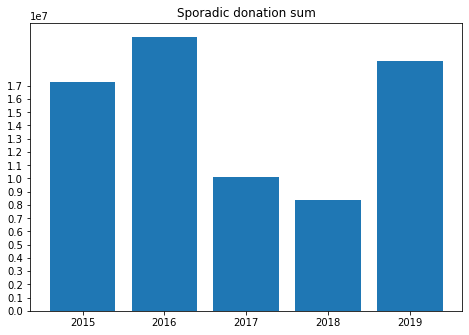

2015: 17260233.705
2019: 18888924.314999994
Down by 109.44 %


In [108]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_yticks(np.arange(0, 18000000, 1000000))
years = ['2015', '2016', '2017', '2018', '2019']
counts = [
    round(df['sum_2015'].sum()),
    round(df['sum_2016'].sum()),
    round(df['sum_2017'].sum()),
    round(df['sum_2018'].sum()),
    round(df['sum_2019'].sum())
]

ax.bar(years, counts)
plt.title('Sporadic donation sum')
plt.show()

print("2015:", df['sum_2015'].sum())
print("2019:", df['sum_2019'].sum())
print("Down by", round((df['sum_2019'].sum() / df['sum_2015'].sum()) * 100,2), "%" )

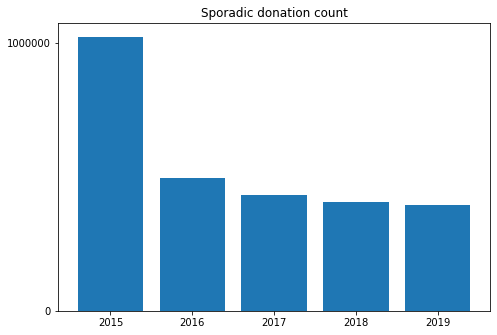

2015: 1023280
2019: 392960
Down by 38.4 %


In [109]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_yticks(np.arange(0, 18000000, 1000000))
years = ['2015', '2016', '2017', '2018', '2019']
counts = [
    df['count_2015'].sum(),
    df['count_2016'].sum(),
    df['count_2017'].sum(),
    df['count_2018'].sum(),
    df['count_2019'].sum()
]

ax.bar(years, counts)
plt.title('Sporadic donation count')
plt.show()

print("2015:", df['count_2015'].sum())
print("2019:", df['count_2019'].sum())
print("Down by", round((df['count_2019'].sum() / df['count_2015'].sum()) * 100,2), "%" )

In [110]:
print("ids:", df['id'].nunique())
print("total:", df.shape[0])

ids: 406734
total: 406734


# RFM

## rfm
- [https://www.kaggle.com/farazrahman/clustering-the-donors-with-rfm-analysis](https://www.kaggle.com/farazrahman/clustering-the-donors-with-rfm-analysis)

## K means
- https://medium.com/clustering-segmentation/introduction-7321e39c595e
- https://medium.com/@emresirma/customer-segmentation-with-k-means-algorithm-de122c0b4b27
- https://medium.com/analytics-vidhya/customer-segmentation-with-rfm-analysis-kmeans-clustering-32c387d04dfe
- http://www.kimberlycoffey.com/blog/2016/8/k-means-clustering-for-customer-segmentation

## XG Boost
- https://towardsdatascience.com/xgboost-for-multi-class-classification-799d96bcd368
- https://www.kaggle.com/miljan/customer-segmentation
- https://debuggercafe.com/introduction-to-xgboost-in-python/
- https://medium.com/merino-services-analytics-blog/customer-segmentation-with-rfm-analysis-part-2-eadf3b220540
- https://towardsdatascience.com/boosting-sales-through-customer-segmentation-analysis-knowing-the-market-better-8c7feebd3479

## Step 1
The first step in building an RFM model is to assign Recency, Frequency and Monetary values to each customer. 

## Step 2
The second step is to divide the customer list into tiered groups for each of the three dimensions (R, F and M)

## Step 3
The third step is to select groups of customers to whom specific types of communications will be sent, based on the RFM segments in which they appear.

## Recency: When was the last time they donated?

In [111]:
# add last_payment_year and last_payment_month to the dataset
df['last_payment_year'] = df['last_payment_date'].apply(lambda x: x.split(".")[2]) 
df['last_payment_month'] = df['last_payment_date'].apply(lambda x: x.split(".")[1])

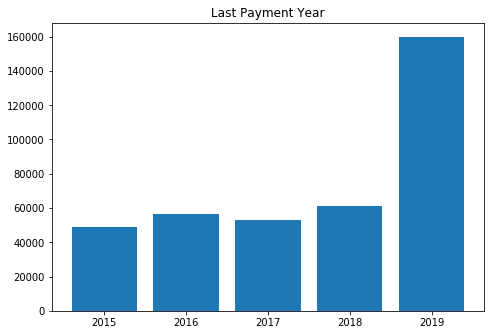

In [112]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_yticks(np.arange(0, 200000, 20000))
years = ['2015', '2016', '2017', '2018', '2019']
counts = [
    len(df[df['last_payment_year'] == '2015']),
    len(df[df['last_payment_year'] == '2016']),
    len(df[df['last_payment_year'] == '2017']),
    len(df[df['last_payment_year'] == '2018']),
    len(df[df['last_payment_year'] == '2019'])
]

ax.bar(years, counts)
plt.title('Last Payment Year')
plt.show()

## Frequency: How often and for how long have they donated?

In [113]:
df_2019 = df[df['last_payment_year'] == '2019']
df_2019.shape

(160098, 23)

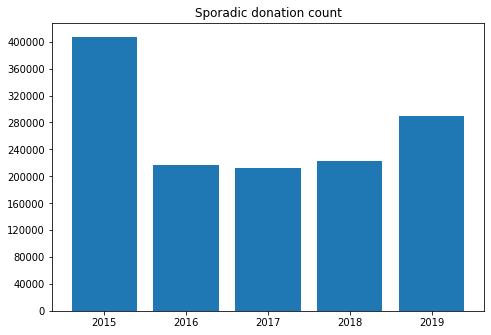

In [114]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_yticks(np.arange(0, 410000, 40000))
years = ['2015', '2016', '2017', '2018', '2019']
counts = [
    df_2019['count_2015'].sum(),
    df_2019['count_2016'].sum(),
    df_2019['count_2017'].sum(),
    df_2019['count_2018'].sum(),
    df_2019['count_2019'].sum()
]

ax.bar(years, counts)
plt.title('Sporadic donation count')
plt.show()

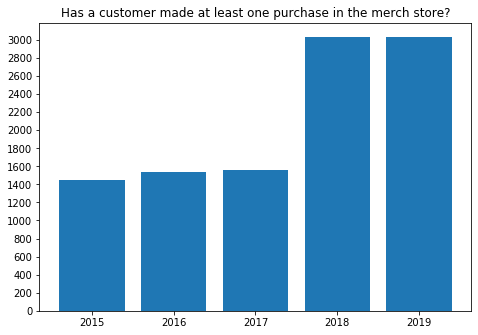

In [115]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_yticks(np.arange(0, 3200, 200))
years = ['2015', '2016', '2017', '2018', '2019']
counts = [
    df_2019['merch_2015'].sum(),
    df_2019['merch_2016'].sum(),
    df_2019['merch_2017'].sum(),
    df_2019['merch_2018'].sum(),
    df_2019['merch_2019'].sum()
]

ax.bar(years, counts)
plt.title('Has a customer made at least one purchase in the merch store?')
plt.show()

## Monetary: How much have they donated?

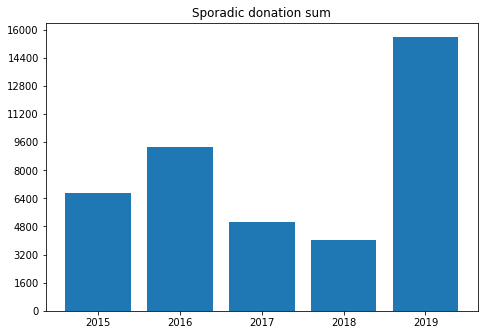

In [116]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_yticks(np.arange(0, 18000, 1600))
years = ['2015', '2016', '2017', '2018', '2019']
counts = [
    round(df_2019['sum_2015'].sum()) / 1000,
    round(df_2019['sum_2016'].sum()) / 1000,
    round(df_2019['sum_2017'].sum()) / 1000,
    round(df_2019['sum_2018'].sum()) / 1000,
    round(df_2019['sum_2019'].sum()) / 1000
]

ax.bar(years, counts)
plt.title('Sporadic donation sum')
plt.show()

## Calculate RFM Values for each customer
- Recency: a group for each year, for example: <br/>
-- Donated in 2015 -> Group 0<br/>
-- Donated in 2019 -> Group 4

- Frequency + Monetary<br/>
-- We take the sums of e.g. sum_2015 to sum_2019 <br/>
-- Calculate the percentiles for each new feature (e.g. 25% percentile of merch sales)<br/>
-- Assign each customer a group depending on the percentile

In [117]:
def assign_resency_group(last_payment_year):
    if last_payment_year == "2015":
        return "0"
    if last_payment_year == "2016":
        return "1"
    if last_payment_year == "2017":
        return "2"
    if last_payment_year == "2018":
        return "3"
    if last_payment_year == "2019":
        return "4"     

In [118]:
# frequency
frequency_groups = []
for index, row in df.iterrows():
    counts = 0
    counts = counts + row['count_2015']
    counts = counts + row['count_2016']
    counts = counts + row['count_2017']
    counts = counts + row['count_2018']
    counts = counts + row['count_2019']
    frequency_groups.append(counts)

In [119]:
# monetary
sum_orders_total = []
for index, row in df.iterrows():
    sum_orders = 0
    sum_orders = sum_orders + row['sum_2015']
    sum_orders = sum_orders + row['sum_2016']
    sum_orders = sum_orders + row['sum_2017']
    sum_orders = sum_orders + row['sum_2018']
    sum_orders = sum_orders + row['sum_2019']
    sum_orders_total.append(sum_orders)

In [120]:
df['recency_group'] = df['last_payment_year'].apply(lambda x: assign_resency_group(x)) 
df['frequency_group'] = frequency_groups
df['monetary_group_sum'] = sum_orders_total

In [121]:
df.head(1)

,id,gender,dob,zip,count_2015,sum_2015,merch_2015,count_2016,sum_2016,merch_2016,...,count_2019,sum_2019,merch_2019,last_payment_date,penultimate_payment_date,last_payment_year,last_payment_month,recency_group,frequency_group,monetary_group_sum
0,1,female,0,0,0,0.0,0,0,0.0,0,...,1,4.5,0,18.12.2019,0,2019,12,4,1,4.5


In [122]:
## cache the calculations for each column
cache_dict = {}

In [123]:
def assign_percentile(column, value):
    if column + "_20" in cache_dict:
        is_20 = cache_dict[column + "_20"]
    else:
        is_20 = np.percentile(df[column], 20)
        cache_dict[column + "_20"] = is_20 

    if column + "_40" in cache_dict:
        is_40 = cache_dict[column + "_40"]
    else:
        is_40 = np.percentile(df[column], 40)
        cache_dict[column + "_40"] = is_40         

    if column + "_60" in cache_dict:
        is_60 = cache_dict[column + "_60"]
    else:
        is_60 = np.percentile(df[column], 60)
        cache_dict[column + "_60"] = is_60 

    if column + "_80" in cache_dict:
        is_80 = cache_dict[column + "_80"]
    else:
        is_80 = np.percentile(df[column], 80)
        cache_dict[column + "_80"] = is_80 

    if value >= is_80:
        return 4
    if value >= is_60:
        return 3
    if value >= is_40:
        return 2
    if value >= is_20:
        return 2        
    return 0


In [124]:
df['frequency_group_p'] = df['frequency_group'].apply(lambda x: assign_percentile('frequency_group', x)) 


In [125]:
df['monetary_group_sum_p'] = df['monetary_group_sum'].apply(lambda x: assign_percentile('monetary_group_sum', x)) 

In [126]:
df.head()

,id,gender,dob,zip,count_2015,sum_2015,merch_2015,count_2016,sum_2016,merch_2016,...,merch_2019,last_payment_date,penultimate_payment_date,last_payment_year,last_payment_month,recency_group,frequency_group,monetary_group_sum,frequency_group_p,monetary_group_sum_p
0,1,female,0,0,0,0.0,0,0,0.0,0,...,0,18.12.2019,0,2019,12,4,1,4.50,2,0
1,2,female,0,0,0,0.0,0,0,0.0,0,...,0,28.12.2019,0,2019,12,4,1,1.53,2,0
2,3,female,0,0,0,0.0,0,0,0.0,0,...,0,05.12.2019,0,2019,12,4,1,3.00,2,0
3,4,female,0,0,0,0.0,0,0,0.0,0,...,0,04.06.2019,0,2019,06,4,1,4.50,2,0
4,5,female,0,0,0,0.0,0,0,0.0,0,...,0,30.03.2019,0,2019,03,4,1,4.95,2,0


In [171]:
def add_year_of_birth(dob):
    try:
        return dob.split(".")[2] 
    except:
        return 0

# add the birth_year
df['yob'] = df['dob'].apply(lambda x: add_year_of_birth(x)) 

In [184]:
def clean_zip(zip):
    if len(zip) > 4:
        return "0"
    if "-" in zip:
        return "0"
    return zip

df['zip'] = df['zip'].apply(lambda x: clean_zip(x)) 
df['zip'].unique()

array(['0', '4318', '6400', ..., '9010', '1081', '1814'], dtype=object)

In [185]:
columns_to_use = [
    'id',
    'gender',
    'yob',
    'zip',
    'recency_group',
    'frequency_group_p',
    'monetary_group_sum_p']

In [229]:
df_kmeans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406734 entries, 0 to 406733
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    406734 non-null  int64 
 1   gender                406734 non-null  object
 2   yob                   406734 non-null  object
 3   zip                   406734 non-null  object
 4   recency_group         379475 non-null  object
 5   frequency_group_p     406734 non-null  int64 
 6   monetary_group_sum_p  406734 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 21.7+ MB


In [228]:
df['gender'] = df['gender'].astype('category') 

In [251]:
# One Hot Encoding of the Gender Column
labelencoder = LabelEncoder()
df['gender'] = labelencoder.fit_transform(df['gender'])
df['gender'].unique()

array([1, 0, 2])

In [252]:
def convert_to_int(x):
    try:
        return float(x)
    except:
        return 0

In [253]:
df['yob'] = df['yob'].apply(lambda x: convert_to_int(x))
df['zip'] = df['zip'].apply(lambda x: convert_to_int(x))
df['recency_group'] = df['recency_group'].apply(lambda x: convert_to_int(x))

In [255]:
df_kmeans = df[columns_to_use].copy()

In [257]:
# Scaling with Robust Scaler
rfm_model = df_kmeans
standar = RobustScaler()
standar.fit(rfm_model)

rfm_model = standar.transform(rfm_model)
rfm_model = pd.DataFrame(rfm_model, columns=columns_to_use)

In [259]:
# Find K best with Elbow Method 
## Modeling with KMeans
inertia_list = []

for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(rfm_model[columns_to_use])
    inertia_list.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

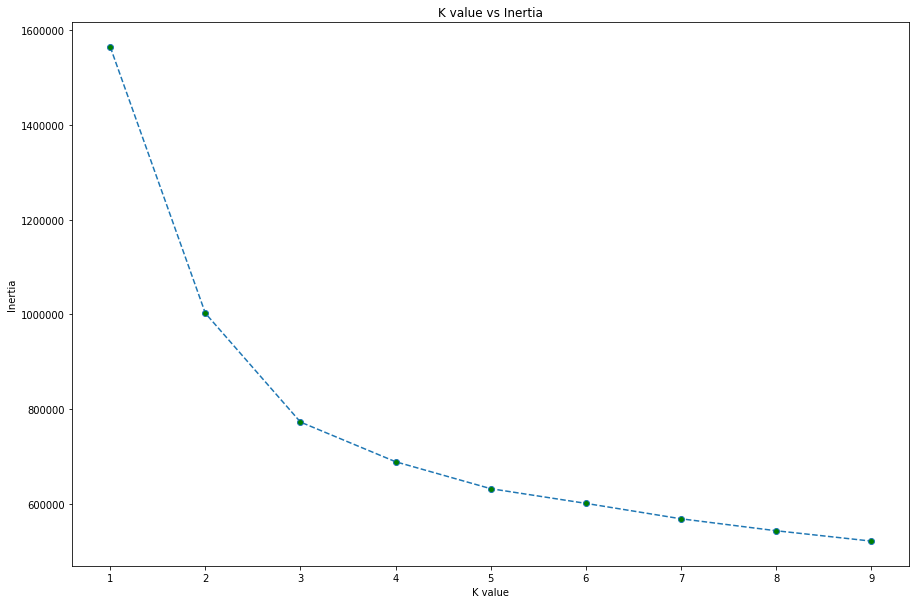

In [261]:
# Show graph elbow method
plt.figure(figsize=(15,10))
plt.plot(range(1,10),inertia_list,marker='o',markerfacecolor='green',linestyle='dashed')
plt.title('K value vs Inertia')
plt.xlabel('K value')
plt.ylabel('Inertia')

## Todo: 
- Zweite Methode anwenden
- Was machen wir mit den Infos?